In [4]:
# ===============================
# GLOBAL PRESENTATION STYLING
# ===============================

import plotly.express as px
from IPython.display import display, HTML

# ---- Color Palette ----
PRIMARY_BLUE = "#1F3A8A"
NOBEL_GOLD = "#D4AF37"
TEAL = "#2A9D8F"
SOFT_ORANGE = "#F4A261"
SLATE = "#6B7280"

custom_colors = [PRIMARY_BLUE, NOBEL_GOLD, TEAL, SOFT_ORANGE, SLATE]

# ---- Plotly Default Styling ----
px.defaults.template = "plotly_white"
px.defaults.color_discrete_sequence = custom_colors

# ---- Notebook CSS Styling ----
display(HTML("""
<style>

body {
    color: #374151;
    font-size: 16px;
}

h1 {color: #D4AF37;}
h2 {color: #1F3A8A;}
h3 {color: #1F3A8A;}

hr {border: 2px solid #D4AF37;}

.section-header {
    background: linear-gradient(to right, #1F3A8A, #D4AF37);
    padding: 14px;
    border-radius: 8px;
    color: white;
    font-size: 22px;
    font-weight: bold;
    margin-top: 30px;
    margin-bottom: 20px;
}

.slide-title {
    color: #1F3A8A;
    font-size: 24px;
    font-weight: bold;
    margin-top: 10px;
}

.insight-box {
    background-color: #F3F4F6;
    padding: 15px;
    border-left: 6px solid #D4AF37;
    border-radius: 6px;
    margin-top: 15px;
}

</style>
"""))


<hr>

<h1 style="text-align:center;">
Nobel Prize Winners Analysis (1901–2025)
</h1>

<h3 style="text-align:center; color:#1F3A8A;">
A Data Analytics Project
</h3>

<p style="text-align:center; font-size:16px;">
<b>Dileshwori Joshi</b><br>
<span style="color:#1F3A8A;">Methodology: CRISP-DM </span><br>
Tools: Python, Pandas, Plotly, Dash<br>
</p>

---
This project analyzes more than 120 years of Nobel Prize data
to uncover trends, patterns, and global developments in scientific recognition.


<div class="slide-title">
📌 Motivation
</div>

The Nobel Prize represents one of the most prestigious global recognitions 
in science, literature, and peace.

It offers:

- Over 120 years of structured historical data  
- Multi-dimensional attributes (year, category, country, gender)  
- A strong foundation for trend analysis and storytelling  


<div class="slide-title">
    🎯 Project Objective
</div>

To conduct a data-driven analysis of Nobel Prizes (1901-2025) in order to:

1. **Identify long-term trends** in Nobel Prize distribution across categories and years.  
2. **Analyze laureate demographics** (e.g., gender, country of birth) and how they change over time.  
3. **Examine patterns of prize sharing** (single vs. multiple laureates, share distributions).  
4. **Explore award motivations** using text analysis to detect common themes and category-specific language.  
5. **Deliver an interactive dashboard** (Plotly Dash) to support filtering and interpretation of insights.

Through systematic **data cleaning**, **exploratory data analysis (EDA)**, and **interactive visualizations**, this project provides a structured and data-driven overview of Nobel Prize history and its evolution up to 2025.

<div class="slide-title">
    🧭 Methodology – CRISP-DM
</div>

1. Business & Data Understanding
2. Data Collection
3. Data Preparation
4. Exploratory Data Analysis
5. Visualization
6. Dashboard Development

<div class="slide-title">
🔌 Data Collection Architecture
</div>

The dataset was collected directly from the official Nobel Prize API (v2.1).

Key aspects:

- REST API with paginated requests  
- Separate endpoints for:
  - Nobel Prizes
  - Laureates  
- Nested JSON structure  
- Raw data stored in structured project folders  

<div style="text-align:center; font-size:18px; line-height:1.8;">
🌐 API <br>
↓ <br>
📦 Raw JSON <br>
↓ <br>
🧹 Data Preparation <br>
↓ <br>
📊 EDA <br>
↓ <br>
🖥 Dashboard
</div>


<div class="slide-title">
🧹 Data Preparation Overview
</div>

To prepare the Nobel Prize dataset for analysis:

- Downloaded raw data from the Nobel Prize **API (v2.1)** and stored JSON snapshots  
- Flattened nested JSON into three structured tables:
  - `prizes.csv` (one row per year × category)
  - `laureates.csv` (one row per laureate: person/organization)
  - `prize_laureate.csv` (bridge table: prize–laureate relationships, share, motivation)
- Created stable join keys (`prize_id`, `laureate_id`) and merged tables into `analysis_dataset.csv`
- Extracted and cleaned key fields (category text, names, birth country, dates when available)
- Kept missing values as **NA** (e.g., gender for organizations) to preserve data integrity
- Converted `award_year` to numeric and created derived fields (e.g., `decade`, `age_at_award`) for EDA

Goal: Transform hierarchical API data into **analysis-ready relational tables** suitable for EDA and dashboarding.


<div class="slide-title">
📦 Final Dataset Overview
</div>

After cleaning and transformation:

- Observations (rows):  1026
- Features (columns):  31
- Time range: 1901–2025  
- Entity types: Individuals(995) & Organizations(31)
- The original laureates dataset contains 1,018 unique laureates:
990 individuals and 28 organizations.

- After merging with prize data, the total rows increase to 1,026 because some laureates have won multiple Nobel Prizes.
Therefore, the merged dataset represents prize occurrences rather than unique individuals.


### Data Structure

- Numeric fields: year, prize_id
- Categorical fields: category, gender, laureate_type  
- Text fields: motivation
- Identifier Fields: prize_id, laureate_id  

All fields were validated for missing values and consistency.


<div class="section-header">
  Exploratory Data Analysis
</div>

## Exploratory Data Analysis (EDA)

In this section, the prepared **analysis_dataset.csv** was used to generate key insights:

- **Trend over time** (unique prizes per year)
- **Category distribution**
- **Top birth countries (persons only)**
- **Gender trend over decades**
- **Prize sharing patterns**

> Note: The dataset contains one row per **prize–laureate** record.  
> To avoid double counting,  **unique `prize_id`** was used when counting prizes.


In [6]:
#Load and inspect
from pathlib import Path
import numpy as np
import pandas as pd

CWD = Path.cwd().resolve()
PROJECT_ROOT = CWD.parent
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

analysis_path = PROCESSED_DIR / "analysis_dataset.csv"
df = pd.read_csv(analysis_path)

print("Loaded:", analysis_path)
# Quick overview (so slides match your real file)
print("Shape:", df.shape)
print("Year range:", int(df["award_year"].min()), "-", int(df["award_year"].max()))
print("Unique prizes:", df["prize_id"].nunique())
print("Unique laureates:", df["laureate_id"].nunique())
print("Laureate types:\n", df["laureate_type"].value_counts(dropna=False))
df.head(5)

Loaded: C:\0_DA\Source\Data_Analytics_Project\data\processed\analysis_dataset.csv
Shape: (1026, 31)
Year range: 1901 - 2025
Unique prizes: 633
Unique laureates: 1018
Laureate types:
 laureate_type
person          995
organization     31
Name: count, dtype: int64


,prize_id,laureate_id,motivation,share,portion,sort_order,award_year,category,category_full,date_awarded,...,birth_country_original,death_date,death_city,death_country_now,wikipedia_en,wikidata_id,decade,birth_date_parsed,date_awarded_parsed,age_at_award
0,1901_chemistry,160,in recognition of the extraordinary services h...,NaN,1,1,1901,Chemistry,The Nobel Prize in Chemistry,1901-11-12,...,the Netherlands,1911-03-01,Berlin,Germany,https://en.wikipedia.org/wiki/Jacobus_Henricus...,Q102822,1900,1852-08-30,1901-11-12,49.0
1,1901_literature,569,in special recognition of his poetic compositi...,NaN,1,1,1901,Literature,The Nobel Prize in Literature,1901-11-14,...,France,1907-09-07,Châtenay,France,https://en.wikipedia.org/wiki/Sully_Prudhomme,Q42247,1900,1839-03-16,1901-11-14,62.0
2,1901_peace,462,for his humanitarian efforts to help wounded s...,NaN,1/2,1,1901,Peace,The Nobel Peace Prize,1901-12-10,...,Switzerland,1910-10-30,Heiden,Switzerland,https://en.wikipedia.org/wiki/Henry_Dunant,Q12091,1900,1828-05-08,1901-12-10,73.0
3,1901_peace,463,for his lifelong work for international peace ...,NaN,1/2,2,1901,Peace,The Nobel Peace Prize,1901-12-10,...,France,1912-06-12,Paris,France,https://en.wikipedia.org/wiki/Frédéric_Passy,Q180409,1900,1822-05-20,1901-12-10,79.0
4,1901_physics,1,in recognition of the extraordinary services h...,NaN,1,1,1901,Physics,The Nobel Prize in Physics,1901-11-12,...,Prussia,1923-02-10,Munich,Germany,https://en.wikipedia.org/wiki/Wilhelm_Röntgen,Q35149,1900,1845-03-27,1901-11-12,56.0


<div class="slide-title">
📈 Nobel Prizes Over Time
</div>

How has the number of Nobel Prizes evolved since 1901? <br>
Counts **unique prizes** per year(not rows), so shared prizes are not double-counted.


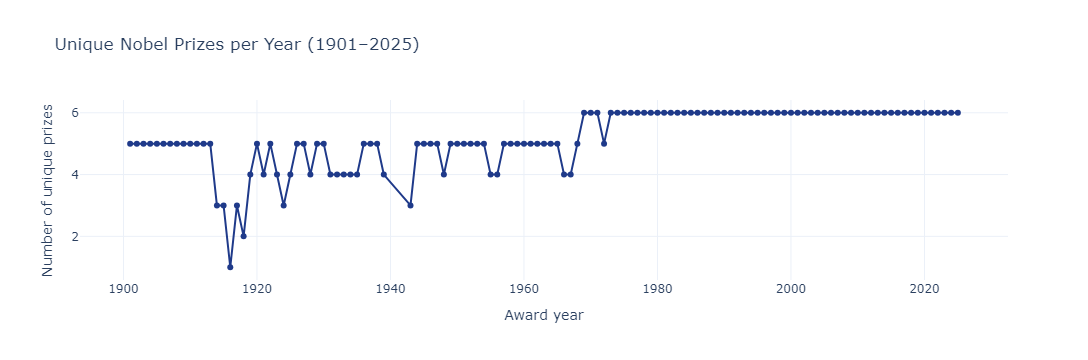

Insight: Peak year = 1969 with 6 unique prizes.


In [7]:
prizes_per_year = (
    df.groupby("award_year")["prize_id"].nunique()
      .reset_index(name="n_prizes")
      .sort_values("award_year")
)

fig = px.line(prizes_per_year, x="award_year", y="n_prizes", markers=True,
              title="Unique Nobel Prizes per Year (1901–2025)")
fig.update_layout(xaxis_title="Award year", yaxis_title="Number of unique prizes")
fig.show()

peak_year = int(prizes_per_year.loc[prizes_per_year["n_prizes"].idxmax(), "award_year"])
peak_count = int(prizes_per_year["n_prizes"].max())
print(f"Insight: Peak year = {peak_year} with {peak_count} unique prizes.")


<div class="insight-box">
<b>Insight:</b> 
</div>


<div class="slide-title">
🔬 Distribution by Category
</div>

Which fields dominate Nobel recognition?


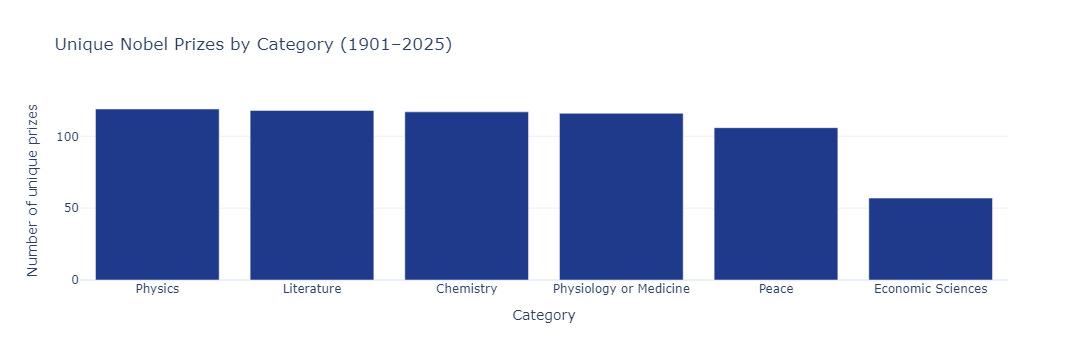

Insight: Top category by unique prizes = Physics.


In [8]:
prizes_by_category = (
    df.groupby("category")["prize_id"].nunique()
      .reset_index(name="n_prizes")
      .sort_values("n_prizes", ascending=False)
)

fig = px.bar(prizes_by_category, x="category", y="n_prizes",
             title="Unique Nobel Prizes by Category (1901–2025)")
fig.update_layout(xaxis_title="Category", yaxis_title="Number of unique prizes")
fig.show()

top_cat = prizes_by_category.iloc[0]["category"]
print(f"Insight: Top category by unique prizes = {top_cat}.")


<div class="slide-title">
🌍 Geographic Distribution of Laureates
</div>

Which countries produce the most Nobel laureates? <br>
This uses `birth_country_now` and includes **persons only** (organizations excluded).

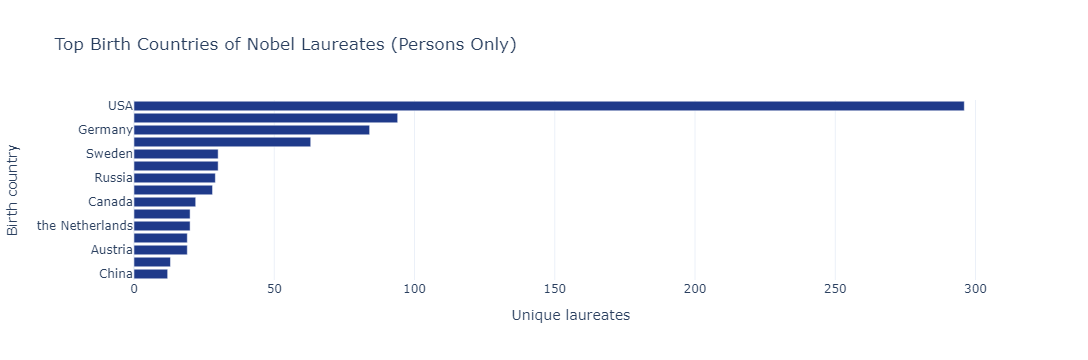

Insight: Country ranking is based on birth country, not citizenship/institution.


In [9]:
persons = df[df["laureate_type"] == "person"].copy()

top_countries = (
    persons.groupby("birth_country_now")["laureate_id"].nunique()
           .reset_index(name="n_laureates")
           .sort_values("n_laureates", ascending=False)
           .head(15)
)

fig = px.bar(top_countries, x="n_laureates", y="birth_country_now", orientation="h",
             title="Top Birth Countries of Nobel Laureates (Persons Only)")
fig.update_layout(xaxis_title="Unique laureates", yaxis_title="Birth country",
                  yaxis={"categoryorder": "total ascending"})
fig.show()

print("Insight: Country ranking is based on birth country, not citizenship/institution.")


<div class="slide-title">
👩‍🔬 Gender Representation
</div>

How has gender participation evolved over time?


## Gender Representation (Persons Only)

**Goal:** Analyze gender representation among Nobel laureates.

**Important:** Organizations do not have gender, so it was filtered to **persons only**.  
 **unique `laureate_id`** (not rows) counted to avoid double counting winners who appear multiple times.

**Outputs:**
- Table: unique laureates by gender (+ percentage)
- Bar chart: gender distribution


,gender_clean,n_laureates,share_%
1,male,923,93.23
0,female,67,6.77


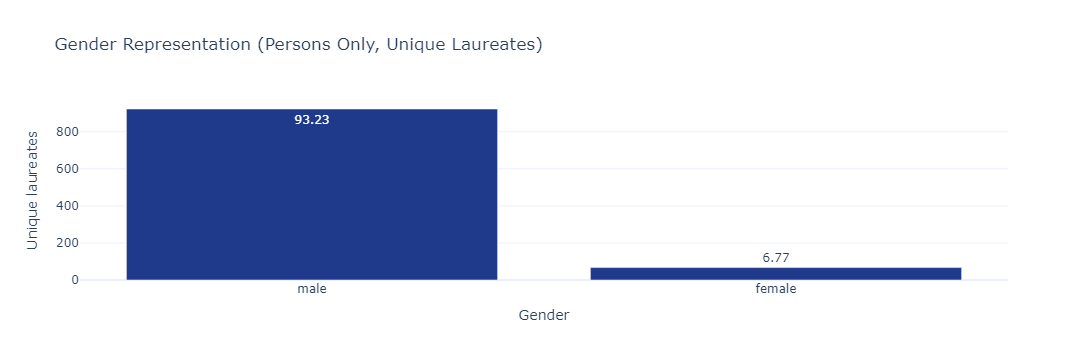

In [11]:
# Persons only (organizations excluded)
persons = df[df["laureate_type"] == "person"].copy()

# Keep missing gender as "Unknown" (only for analysis/plotting)
persons["gender_clean"] = persons["gender"].fillna("Unknown")

# Unique laureates by gender
gender_counts = (
    persons.groupby("gender_clean")["laureate_id"].nunique()
           .reset_index(name="n_laureates")
           .sort_values("n_laureates", ascending=False)
)

# Add percentage share
gender_counts["share_%"] = (gender_counts["n_laureates"] / gender_counts["n_laureates"].sum() * 100).round(2)

display(gender_counts)

# Plot
fig = px.bar(
    gender_counts,
    x="gender_clean",
    y="n_laureates",
    text="share_%",
    title="Gender Representation (Persons Only, Unique Laureates)"
)
fig.update_layout(xaxis_title="Gender", yaxis_title="Unique laureates")
fig.show()


## Gender Trend Over Time (by Decade)

**Goal:** Show how the number of **unique laureates** changes across decades for each gender.

**Notes:**
- Uses `award_year` and `decade` columns.
- Filters to **persons only** (organizations excluded).
- Missing gender is shown as **"Unknown"** (for visualization).


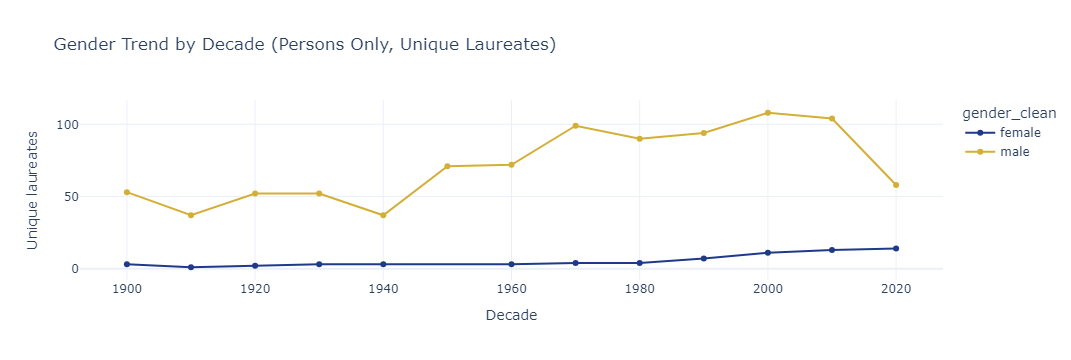

In [14]:
persons = df[df["laureate_type"] == "person"].copy()
persons["gender_clean"] = persons["gender"].fillna("Unknown")

gender_trend = (
    persons.groupby(["decade", "gender_clean"])["laureate_id"].nunique()
           .reset_index(name="n_laureates")
           .sort_values(["decade", "gender_clean"])
)

fig = px.line(
    gender_trend,
    x="decade",
    y="n_laureates",
    color="gender_clean",
    markers=True,
    title="Gender Trend by Decade (Persons Only, Unique Laureates)"
)
fig.update_layout(xaxis_title="Decade", yaxis_title="Unique laureates")
fig.show()


<div class="insight-box">
<b>Insight:</b> Although female participation has increased 
in recent decades, significant gender imbalance persists.
</div>


### 🤝 Prize Sharing Pattern
**Question:** Are Nobel prizes mostly given to one winner, or frequently split between several winners?


## Prize Sharing Pattern

**Goal:** Understand how Nobel prizes are shared among laureates.

**Method:**
- Use the `share` field from the prize–laureate bridge (e.g., `"1"`, `"1/2"`, `"1/3"`).
- Count how often each share occurs across the dataset.
- This shows whether prizes are mostly awarded to **one winner** or **split among multiple winners**.

**Output:** Bar chart of the most common share values.


,portion,n_records
0,1,362
1,1/2,337
2,1/3,249
3,1/4,78


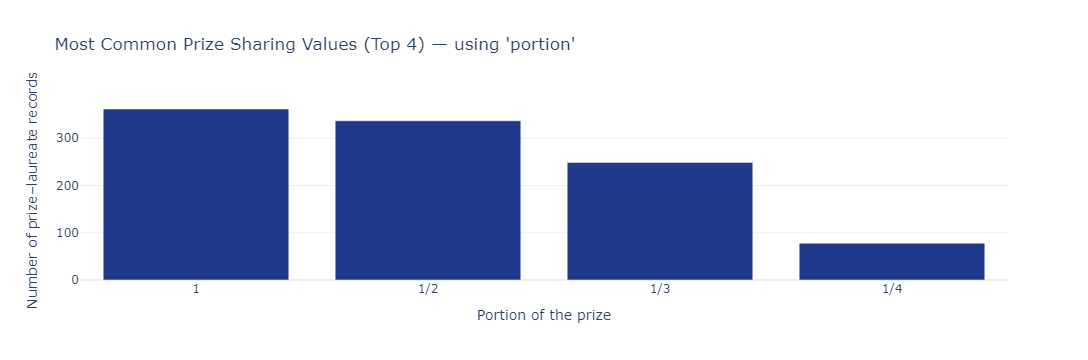

In [20]:
# Prize sharing pattern 
# Uses 'portion' if available (e.g., 1/2, 1/3). Otherwise falls back to 'share'.

# 1) Choose the best column
share_col = "portion" if ("portion" in df.columns and df["portion"].notna().any()) else "share"

# 2) Count values (keep only what exists; title adapts automatically)
share_counts = (
    df[share_col]
      .dropna()
      .astype(str)
      .value_counts()
      .reset_index()
)
share_counts.columns = [share_col, "n_records"]

# Optional: limit for readability
top_n = min(10, len(share_counts))
share_counts = share_counts.head(top_n)

display(share_counts)

# 3) Plot
fig = px.bar(
    share_counts,
    x=share_col,
    y="n_records",
    title=f"Most Common Prize Sharing Values (Top {top_n}) — using '{share_col}'",
)
fig.update_layout(
    xaxis_title="Portion of the prize",
    yaxis_title="Number of prize–laureate records",
)
fig.show()


<div class="insight-box">
<b>Insight:</b> Nobel prizes are often awarded to a single laureate (<code>portion = 1</code>), 
but shared prizes are also common—most frequently split into halves (<code>1/2</code>) or thirds (<code>1/3</code>).
</div>


<div class="section-header">
Interactive Dashboard
</div>


## Interactive Dashboard (Plotly Dash)

To complement the EDA, I built an **interactive dashboard** using **Dash + Plotly**.

**What the dashboard allows:**
- Filter by **Nobel category** and optional **birth country**
- View the **trend of unique prizes per year** (avoids double counting using `prize_id.nunique()`)
- See summary KPIs:
  - unique prizes
  - unique laureates
  - year range
- **Click a year** to drill down and display a **laureates table** (names, motivation, share)

**Why it is useful:**
It makes exploration fast and user-friendly, allowing non-technical users to interact with the results.


<div class="slide-title">
💡 Key Insights
</div>

<ul>
  <li><b>Category distribution:</b> STEM-related categories (Physics, Chemistry, Medicine, Economic Sciences) account for a large share of awards.</li>
  <li><b>Geographic concentration:</b> Laureates are concentrated in a small number of birth countries (birth country ≠ citizenship/institution).</li>
  <li><b>Gender representation:</b> Female participation increases in recent decades, but overall imbalance remains.</li>
  <li><b>Prize sharing:</b> Many prizes are still awarded to single laureates (<code>portion=1</code>), but shared prizes are common (especially <code>1/2</code> and <code>1/3</code>).</li>
  <li><b>Interactive exploration:</b> The dashboard enables filtering by category/country and drill-down by year to inspect laureates and motivations.</li>
</ul>


<div class="section-header">
Conclusion
</div>

This project demonstrates:

- End-to-end data analytics workflow  
- API integration and data engineering  
- Structured exploratory analysis  
- Professional visualization  
- Dashboard development  
